<a href="https://colab.research.google.com/github/Ghaust/beeopicture/blob/main/SSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Récapitulatif***

Ce notebook contient une implémentation de SSD (Single Shot Multibox Detector) avec PyTorch. Ce projet a réalisé dans le cadre du PFE de l'ESIEA par l'équipe Ruche Connectée 294. L'objectif du projet est de détecter le type de pollen présent sur une image de pollens récupérée en laboratoire.

### **Dataset**

Notre jeu de données a été généré par l'outil Recompositron développé par l'entreprise disponible [ici](https://github.com/AzeoGarage/ShareAI-Beeodiversity-SmartBeeHive). Le jeu de données contient 10000 images et 28 classes de pollens. Il a ensuite été formaté Pascal VOC.

### **Modèle et Entrainement**

Le document de recherche est disponible [ici](https://arxiv.org/abs/1512.02325).

Nous avons utilisé une implémentation PyTorch de SSD avec le [framework](https://github.com/lufficc/SSD)
de lufficc de détection d'objets.

### **Inference**

On peut tester l'inférence sur une ou plusieurs images en les uploadant sur Colab. Les images doivent être stockées dans le dossier demo ou alors il faut préciser le chemin dans la commande qui lance le script demo.py.

In [ ]:
# On télécharge la dataset
#!wget http://download1083.mediafire.com/pty5c0lk1vhg/jdt3w4p9kkv5job/voc_pollen.zip

!unzip voc_pollen.zip.1

Streaming output truncated to the last 5000 lines.
  inflating: JPEGImages/06562.jpg    
  inflating: __MACOSX/JPEGImages/._06562.jpg  
  inflating: JPEGImages/00113.jpg    
  inflating: __MACOSX/JPEGImages/._00113.jpg  
  inflating: JPEGImages/09889.jpg    
  inflating: __MACOSX/JPEGImages/._09889.jpg  
  inflating: JPEGImages/04375.jpg    
  inflating: __MACOSX/JPEGImages/._04375.jpg  
  inflating: JPEGImages/02704.jpg    
  inflating: __MACOSX/JPEGImages/._02704.jpg  
  inflating: JPEGImages/02062.jpg    
  inflating: __MACOSX/JPEGImages/._02062.jpg  
  inflating: JPEGImages/04413.jpg    
  inflating: __MACOSX/JPEGImages/._04413.jpg  
  inflating: JPEGImages/00675.jpg    
  inflating: __MACOSX/JPEGImages/._00675.jpg  
  inflating: JPEGImages/08229.jpg    
  inflating: __MACOSX/JPEGImages/._08229.jpg  
  inflating: JPEGImages/09137.jpg    
  inflating: __MACOSX/JPEGImages/._09137.jpg  
  inflating: JPEGImages/06204.jpg    
  inflating: __MACOSX/JPEGImages/._06204.jpg  
  inflating: J

In [ ]:
!mkdir VOC2007 datasets
!mv JPEGImages/ VOC2007/
!mv Annotations/ VOC2007/
!mv ImageSets/ VOC2007/
!mv class_list.txt VOC2007/
!mv labelmap.prototxt VOC2007/
!mv VOC2007/ datasets/
!ls datasets/
!ls datasets/VOC2007

In [ ]:
# Installation des librairies
!git clone https://github.com/Ghaust/SSD
%cd SSD
!pip install -r requirements.txt

Cloning into 'SSD'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 940 (delta 5), reused 20 (delta 5), pack-reused 920
Receiving objects: 100% (940/940), 804.64 KiB | 17.49 MiB/s, done.
Resolving deltas: 100% (540/540), done.
/content/SSD/SSD


In [ ]:
!python train.py --config-file configs/vgg_ssd300_voc0712.yaml

In [ ]:
# Test d'inférence
!python demo.py --config-file configs/vgg_ssd300_voc0712.yaml --images_dir demo --ckpt outputs/vgg_ssd300_voc0712/model_015000.pth

Namespace(ckpt='outputs/vgg_ssd300_voc0712/model_015000.pth', config_file='configs/vgg_ssd300_voc0712.yaml', dataset_type='voc', images_dir='demo', opts=[], output_dir='demo/result', score_threshold=0.7)
Loaded configuration file configs/vgg_ssd300_voc0712.yaml

MODEL:
  NUM_CLASSES: 29
INPUT:
  IMAGE_SIZE: 300
DATASETS:
  TRAIN: ("voc_2007_trainval", "voc_2007_trainval")
  TEST: ("voc_2007_test", )
SOLVER:
  MAX_ITER: 120000
  LR_STEPS: [80000, 100000]
  GAMMA: 0.1
  BATCH_SIZE: 32
  LR: 1e-3

OUTPUT_DIR: 'outputs/vgg_ssd300_voc0712'
Running with config:
DATASETS:
  TEST: ('voc_2007_test',)
  TRAIN: ('voc_2007_trainval', 'voc_2007_trainval')
DATA_LOADER:
  NUM_WORKERS: 8
  PIN_MEMORY: True
INPUT:
  IMAGE_SIZE: 300
  PIXEL_MEAN: [123, 117, 104]
MODEL:
  BACKBONE:
    NAME: vgg
    OUT_CHANNELS: (512, 1024, 512, 256, 256, 256)
    PRETRAINED: True
  BOX_HEAD:
    NAME: SSDBoxHead
    PREDICTOR: SSDBoxPredictor
  CENTER_VARIANCE: 0.1
  DEVICE: cuda
  META_ARCHITECTURE: SSDDetector
  NEG_

In [ ]:
!find datasets/VOC2007/Annotations -empty -type f
#!echo "<?xml version="1.0" encoding="utf-8"?><annotation><filename>02456.jpg</filename><size><width>960</width><height>640</height><depth>1</depth></size><object><name>Turpinia_occidentalis</name><bndbox><xmin>685</xmin><ymin>125</ymin><xmax>765</xmax><ymax>206</ymax></bndbox></object><object><name>Adenia_perrieri</name><bndbox><xmin>284</xmin><ymin>570</ymin><xmax>354</xmax><ymax>636</ymax></bndbox></object><object><name>Acacia_pennata</name><bndbox><xmin>740</xmin><ymin>412</ymin><xmax>820</xmax><ymax>489</ymax></bndbox></object><object><name>Vernonia_mandrarensis</name><bndbox><xmin>136</xmin><ymin>420</ymin><xmax>236</xmax><ymax>512</ymax></bndbox></object><object><name>Mibora_minima</name><bndbox><xmin>650</xmin><ymin>542</ymin><xmax>700</xmax><ymax>592</ymax></bndbox></object><object><name>Woodwardia_radicans</name><bndbox><xmin>155</xmin><ymin>388</ymin><xmax>295</xmax><ymax>484</ymax></bndbox></object><object><name>Abatia_canescens</name><bndbox><xmin>652</xmin><ymin>236</ymin><xmax>692</xmax><ymax>282</ymax></bndbox></object><object><name>Ziziphus_jujuba</name><bndbox><xmin>23</xmin><ymin>536</ymin><xmax>83</xmax><ymax>593</ymax></bndbox></object><object><name>Vaccinium_secundiflorum</name><bndbox><xmin>298</xmin><ymin>226</ymin><xmax>388</xmax><ymax>320</ymax></bndbox></object><object><name>Weigela_florida</name><bndbox><xmin>172</xmin><ymin>352</ymin><xmax>292</xmax><ymax>466</ymax></bndbox></object><object><name>Plantago_lanceolata</name><bndbox><xmin>680</xmin><ymin>90</ymin><xmax>736</xmax><ymax>148</ymax></bndbox></object><object><name>Chilopsis_linearis</name><bndbox><xmin>889</xmin><ymin>497</ymin><xmax>959</xmax><ymax>557</ymax></bndbox></object><object><name>Turpinia_occidentalis</name><bndbox><xmin>708</xmin><ymin>110</ymin><xmax>788</xmax><ymax>188</ymax></bndbox></object><object><name>Acacia_pennata</name><bndbox><xmin>180</xmin><ymin>223</ymin><xmax>260</xmax><ymax>306</ymax></bndbox></object><object><name>Abelia_rupestris</name><bndbox><xmin>496</xmin><ymin>132</ymin><xmax>646</xmax><ymax>289</ymax></bndbox></object></annotation>" >> datasets/VOC2007/Annotations/02456.xml
!cat datasets/VOC2007/Annotations/02456.xml

﻿<?xml version="1.0" encoding="utf-8"?><annotation><filename>02456.jpg</filename><size><width>960</width><height>640</height><depth>1</depth></size><object><name>Vernonia_mandrarensis</name><bndbox><xmin>449</xmin><ymin>367</ymin><xmax>549</xmax><ymax>475</ymax></bndbox></object><object><name>Euphorbia_orthoclada</name><bndbox><xmin>550</xmin><ymin>435</ymin><xmax>656</xmax><ymax>548</ymax></bndbox></object><object><name>Colignonia_rufopilosa</name><bndbox><xmin>300</xmin><ymin>389</ymin><xmax>350</xmax><ymax>438</ymax></bndbox></object><object><name>Weigela_florida</name><bndbox><xmin>181</xmin><ymin>60</ymin><xmax>301</xmax><ymax>188</ymax></bndbox></object><object><name>Vernonia_mandrarensis</name><bndbox><xmin>482</xmin><ymin>194</ymin><xmax>582</xmax><ymax>299</ymax></bndbox></object><object><name>Mibora_minima</name><bndbox><xmin>587</xmin><ymin>217</ymin><xmax>637</xmax><ymax>271</ymax></bndbox></object><object><name>Acacia_perryi</name><bndbox><xmin>337</xmin><ymin>45</ymin><xm

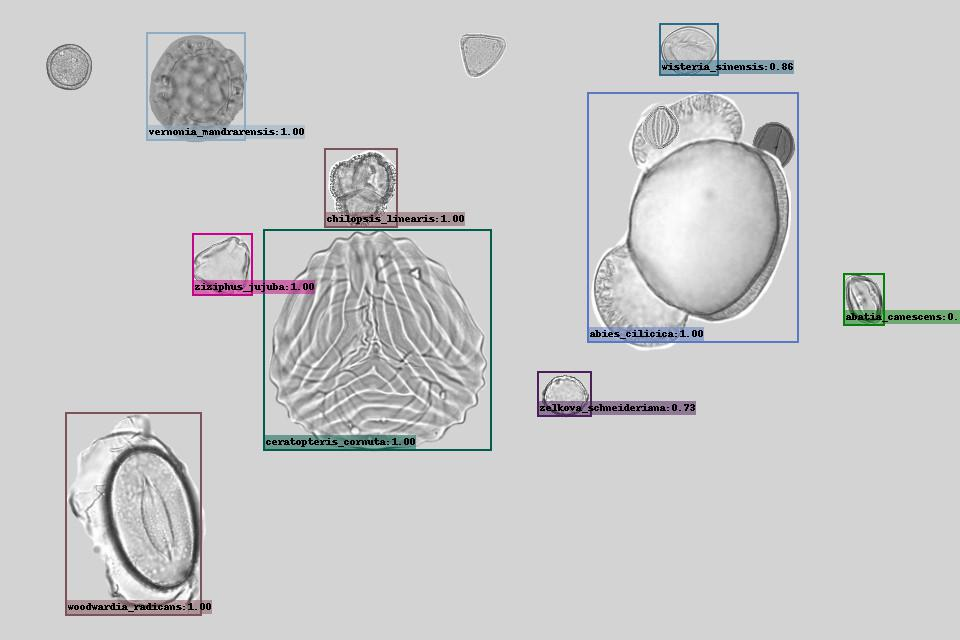

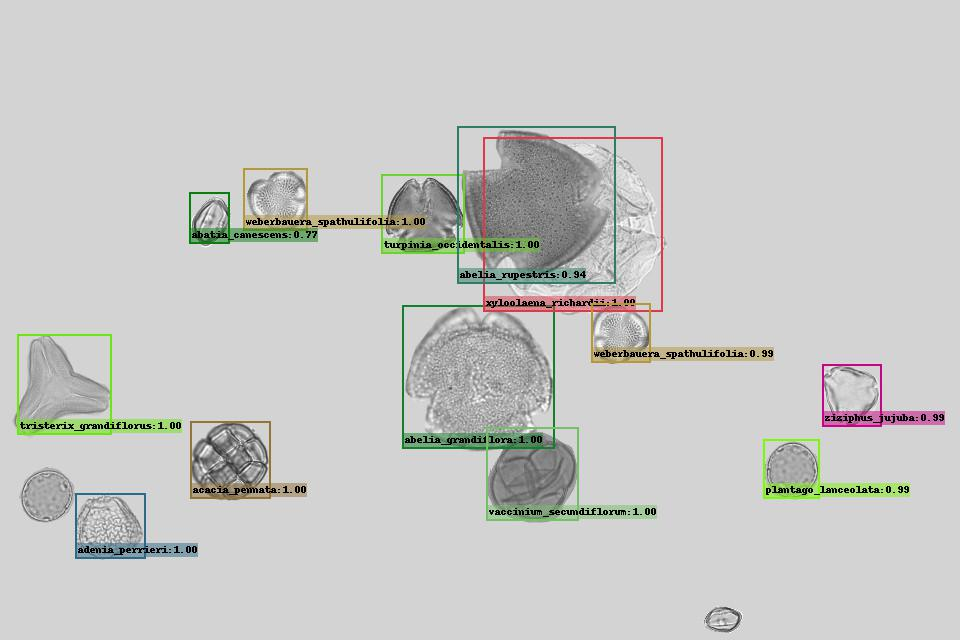

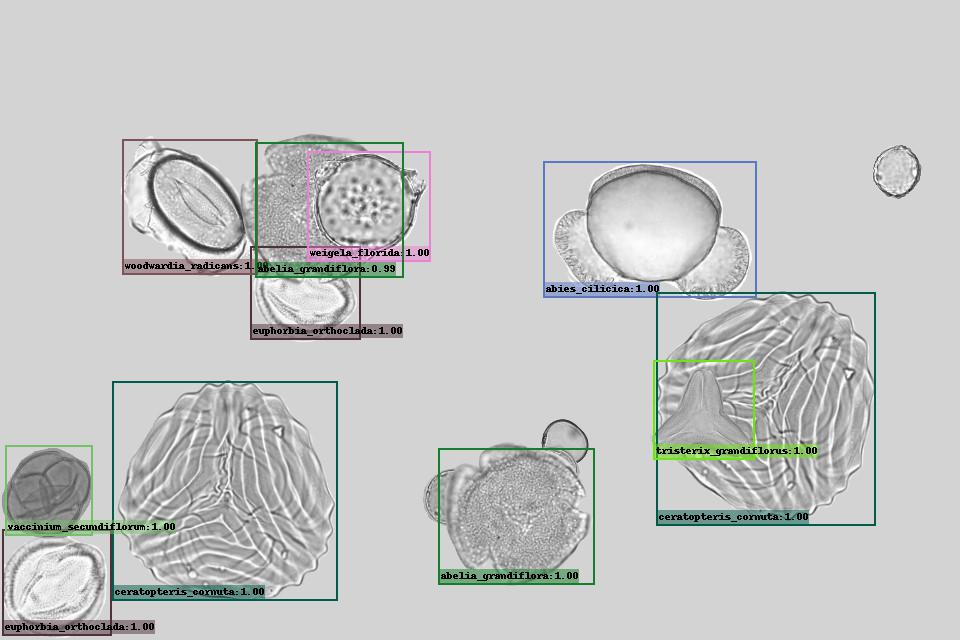

In [ ]:
from IPython.display import Image, display
import os

l = []
for filename in os.listdir('/content/SSD/demo/result'):
    if filename.endswith(".jpg") : 
        img = Image("/content/SSD/demo/result/"+filename)
        l.append(img)

for i in range(len(l)):
  display(l[i])
  print("\n")

        

In [ ]:
!unzip ssd_12500_itr.zip

Archive:  ssd_12500_itr.zip
   creating: outputs/
   creating: outputs/vgg_ssd300_voc0712/
  inflating: outputs/vgg_ssd300_voc0712/model_010000.pth  
  inflating: outputs/vgg_ssd300_voc0712/log.txt  
   creating: outputs/vgg_ssd300_voc0712/inference/
   creating: outputs/vgg_ssd300_voc0712/inference/voc_2007_test/
  inflating: outputs/vgg_ssd300_voc0712/inference/voc_2007_test/predictions.pth  
   creating: outputs/vgg_ssd300_voc0712/.ipynb_checkpoints/
 extracting: outputs/vgg_ssd300_voc0712/last_checkpoint.txt  
   creating: outputs/vgg_ssd300_voc0712/tf_logs/
  inflating: outputs/vgg_ssd300_voc0712/tf_logs/events.out.tfevents.1606763014.54419aa7f558.4389.0  
  inflating: outputs/vgg_ssd300_voc0712/tf_logs/events.out.tfevents.1606739751.54419aa7f558.983.0  
  inflating: outputs/vgg_ssd300_voc0712/tf_logs/events.out.tfevents.1606742934.54419aa7f558.1571.0  
  inflating: outputs/vgg_ssd300_voc0712/tf_logs/events.out.tfevents.1606743628.54419aa7f558.1783.0  
  inflating: outputs/vgg_ssd